<a href="https://colab.research.google.com/github/baher2000/Baher/blob/main/Clustering_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering - Mini-Project 3

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:

ID:

Tutorial:

---

Name:

ID:

Tutorial:

---

Name:

ID:

Tutorial:

---


## Dataset Description

The dataset file contains almost ~3000 different music genres aggregated from more than 170.000 songs collected from Spotify Web API.

Primary:

- genre (Music genre)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0 in decibels (dB))
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)


Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)


**Recommended Reading for Data Understanding**: Spotify's documentation of audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**Acknowledgment**: This dataset was created and published by Yamaç Eren Ay on Kaggle.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [36]:
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/music_genres.csv')
df

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


# **Data inspection** / **Cleaning**



to know information about the DataFrame and the data type of each attribute

In [ ]:
df.info()

to know the description of the data in the DataFrame


In [ ]:
df.describe()

In [ ]:
df.isnull().sum() / df.count() * 100

drop the rows that contain "[]" in genres column

In [ ]:
df = df.drop(df.index[df['genres'] == "[]"])  
df

to check that all rows that contain "[]" in genres column are deleted

In [ ]:
# Convert entire data frame as string and print
print(df.to_string())

# **Q1: What are the 5 most popular music genres?**

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

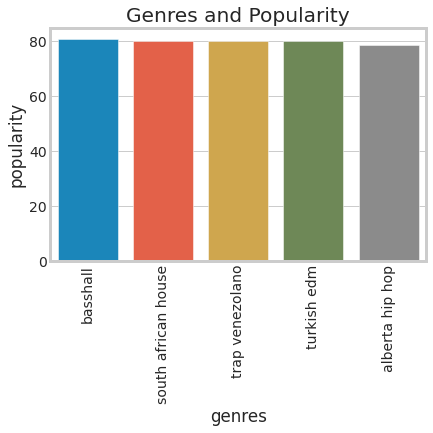

In [42]:
sns.barplot(data = df.nlargest(5, 'popularity'), x = 'genres' , y = 'popularity').set(title='Genres and Popularity')

plt.xticks(rotation = 90)

# **Answer**
basshall , south african house, trap venezolano, turkish edm, and alberta hip hop are the most popular music genres as the barplot show us

# **Q2: What factors affect the Popularity of the song ? (Mention the biggest 2 factors, with interpretation)**

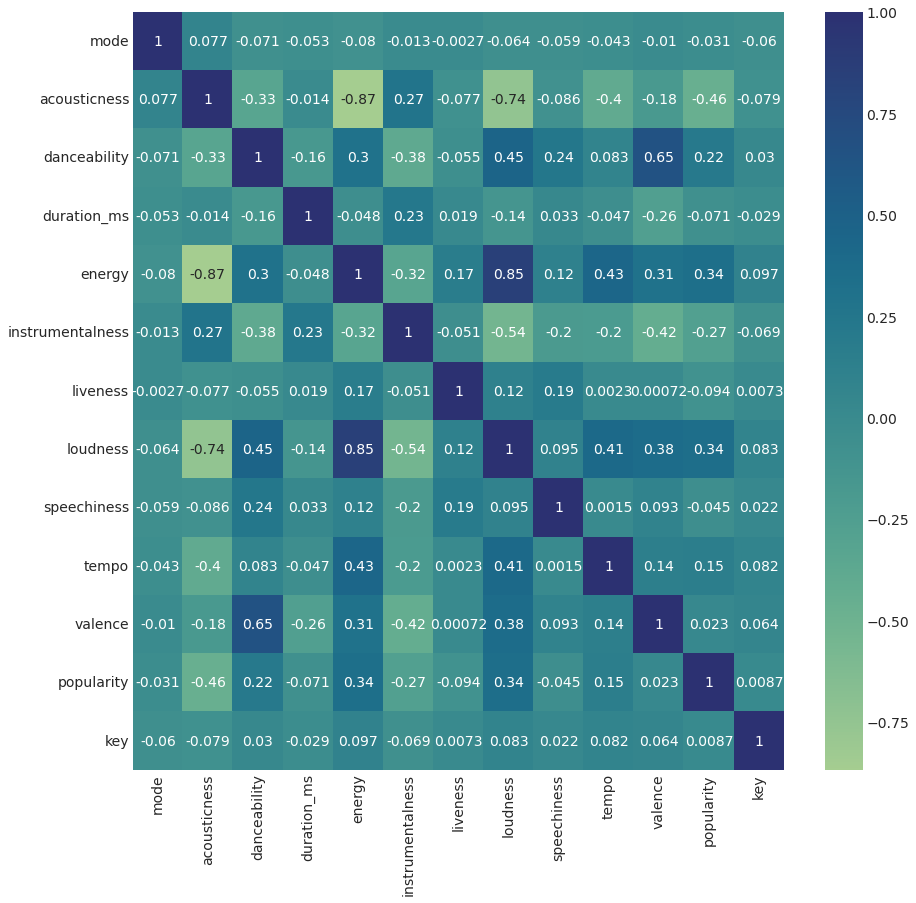

In [43]:
plt.figure(figsize=(13,13))

corr = df.corr()
corr

sns.heatmap(corr, cmap='crest', annot=True)


# **Answer:**
Energy and loudness have the highest positive correlation value which equal to 0.34. Additionally, acousticness has the highest negative correlation value which equal to -0.46

# **Q3: Which genre has the highest energy and which has the lowest?**

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

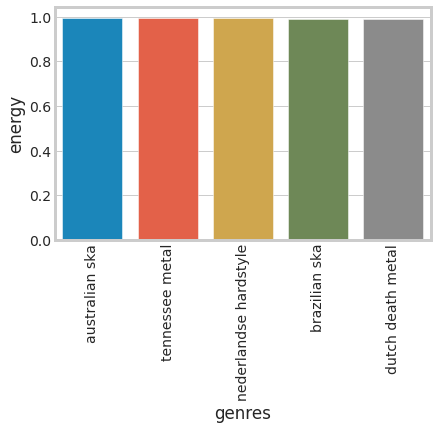

In [44]:
sns.barplot(data = df.nlargest(5, 'energy'), x = 'genres' , y = 'energy')
plt.xticks(rotation = 90)

# **Answer:** 
Australian ska is the genres that has the highest energy as we see on the barplot

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

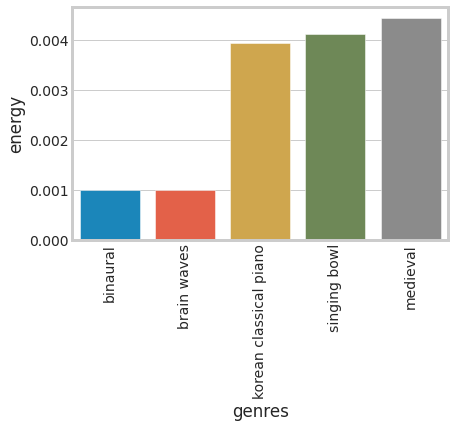

In [45]:
sns.barplot(data = df.nsmallest(5, 'energy'), x = 'genres' , y = 'energy')
plt.xticks(rotation = 90)

# **Answer:** 
Binaural is the genres that has the highest energy as we see on the barplot

# **Q4: What are the most correlated pairs of attributes ? (Mention 2 pairs, with interpretation)**

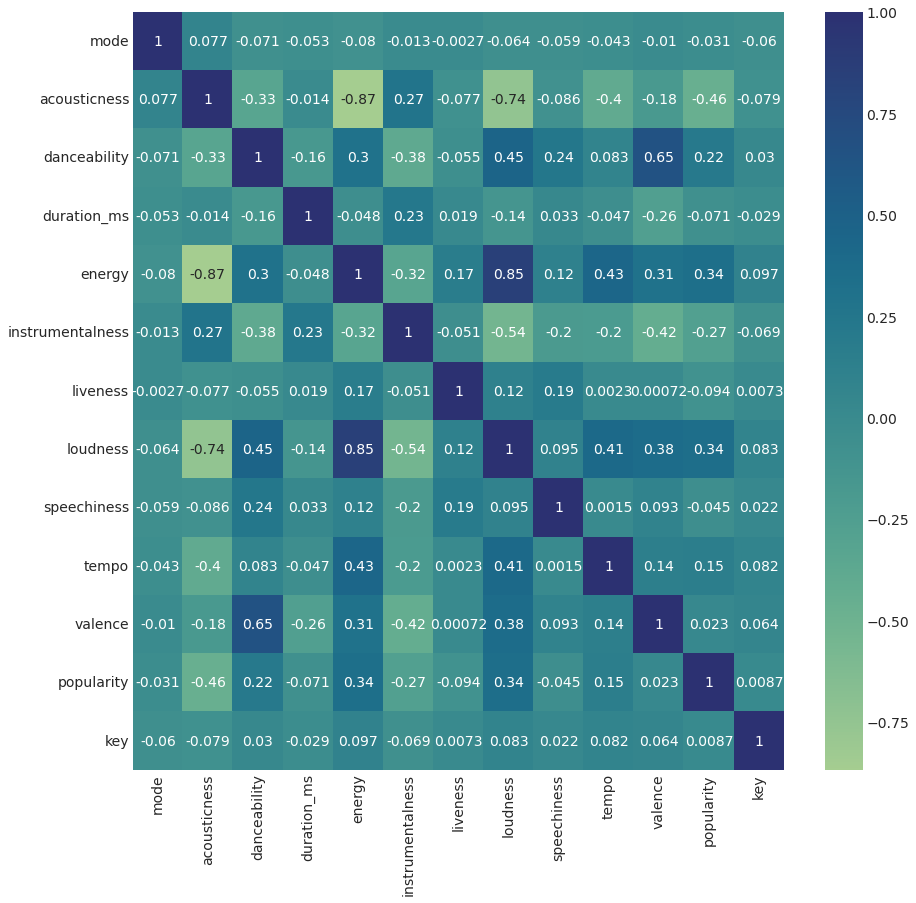

In [46]:
plt.figure(figsize=(13,13))

corr = df.corr()
corr

sns.heatmap(corr, cmap='crest', annot=True)


# **Answer**
Energy  and acousticness are the most correlated pairs of attributes as we see in the heat map they have **-0.87** which is highest negative correlation value

# **Data Preparation for Modelling**

In [47]:
df = df.drop(['genres'], axis =1)

**Comment**


## **Clustering**


In [48]:
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(df)
scaled_data

array([[ 0.44757469,  1.80834218, -2.48432022, ..., -1.92725355,
        -0.72213868,  0.01828198],
       [ 0.44757469,  0.2928222 , -1.57868449, ..., -1.34273793,
         0.75093152, -0.2786254 ],
       [ 0.44757469,  1.12859655,  1.16023582, ...,  2.38955698,
         0.48219574,  0.31518936],
       ...,
       [ 0.44757469, -0.43129108,  1.405072  , ...,  1.64191432,
         0.40257032, -0.2786254 ],
       [-2.23426397,  1.85108692,  1.1182007 , ...,  1.22019541,
        -2.38431924,  0.31518936],
       [ 0.44757469,  0.06218354,  0.61206723, ...,  1.56477877,
        -0.57710667,  0.31518936]])

**Comment**
Normalize all numerical columns in any Clustering Problem

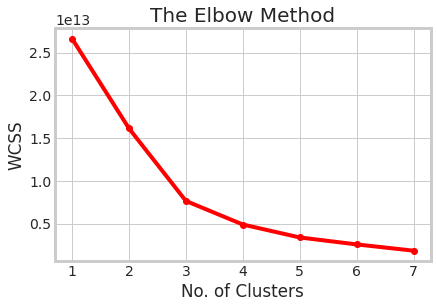

In [49]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 8):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 8), wcss, marker='o', color='red')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()


In [50]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_data)

# As it's difficult to visualise clusters when the data is high-dimensional - we'll use
# boxplots to help us see how the clusters are grouping the samples

df["cluster"] = cluster_labels

# **Cluster Interpretation**

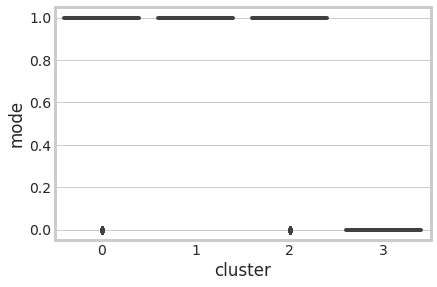

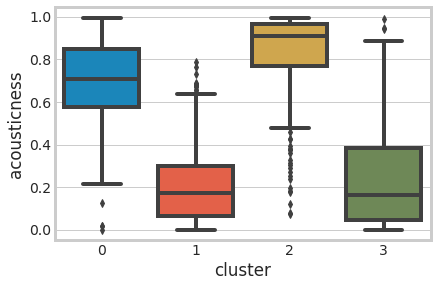

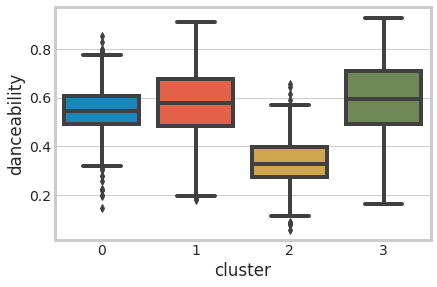

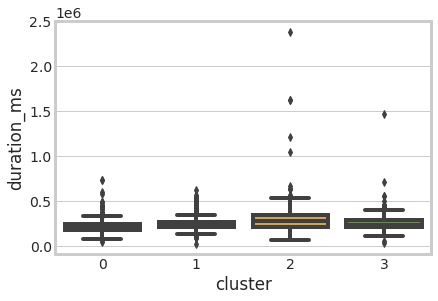

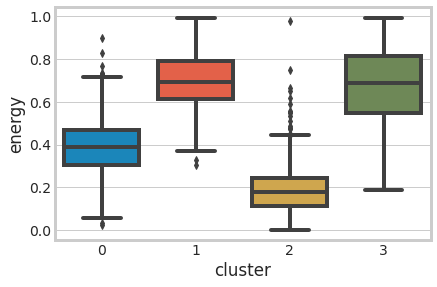

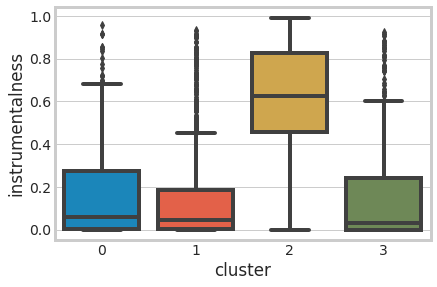

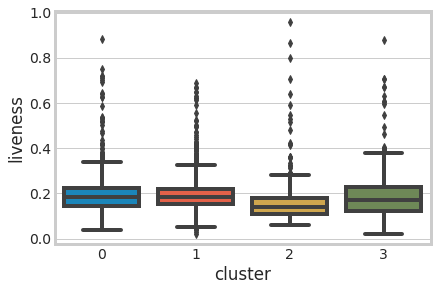

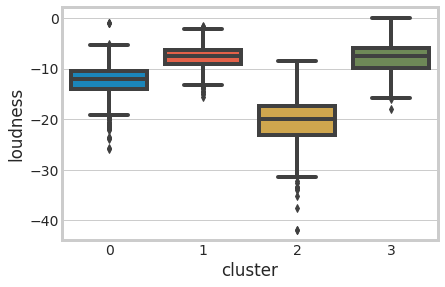

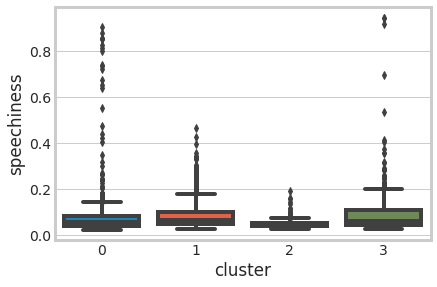

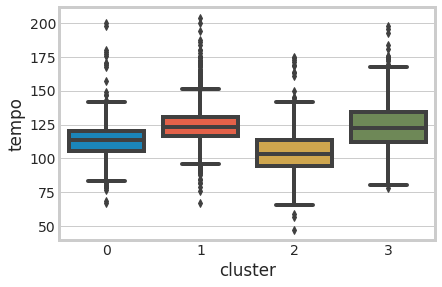

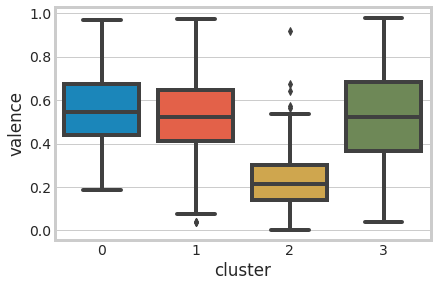

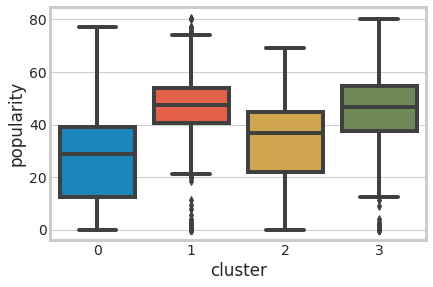

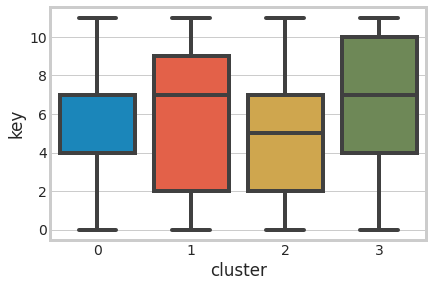

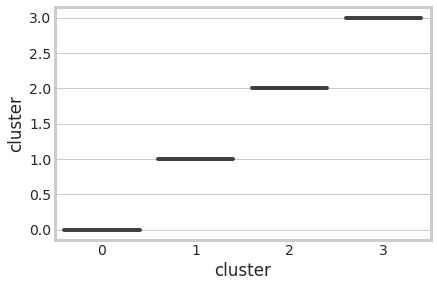

In [51]:
# Minimal code to plot a boxplot of each numerical column
# Categorical columns would need to be plotted differently
# (e.g. using a countplot)

for col in df.select_dtypes('number').columns:
    plt.figure()
    sns.boxplot(x='cluster', y=col, data=df)

(array([-10.,   0.,  10.,  20.]), <a list of 4 Text major ticklabel objects>)

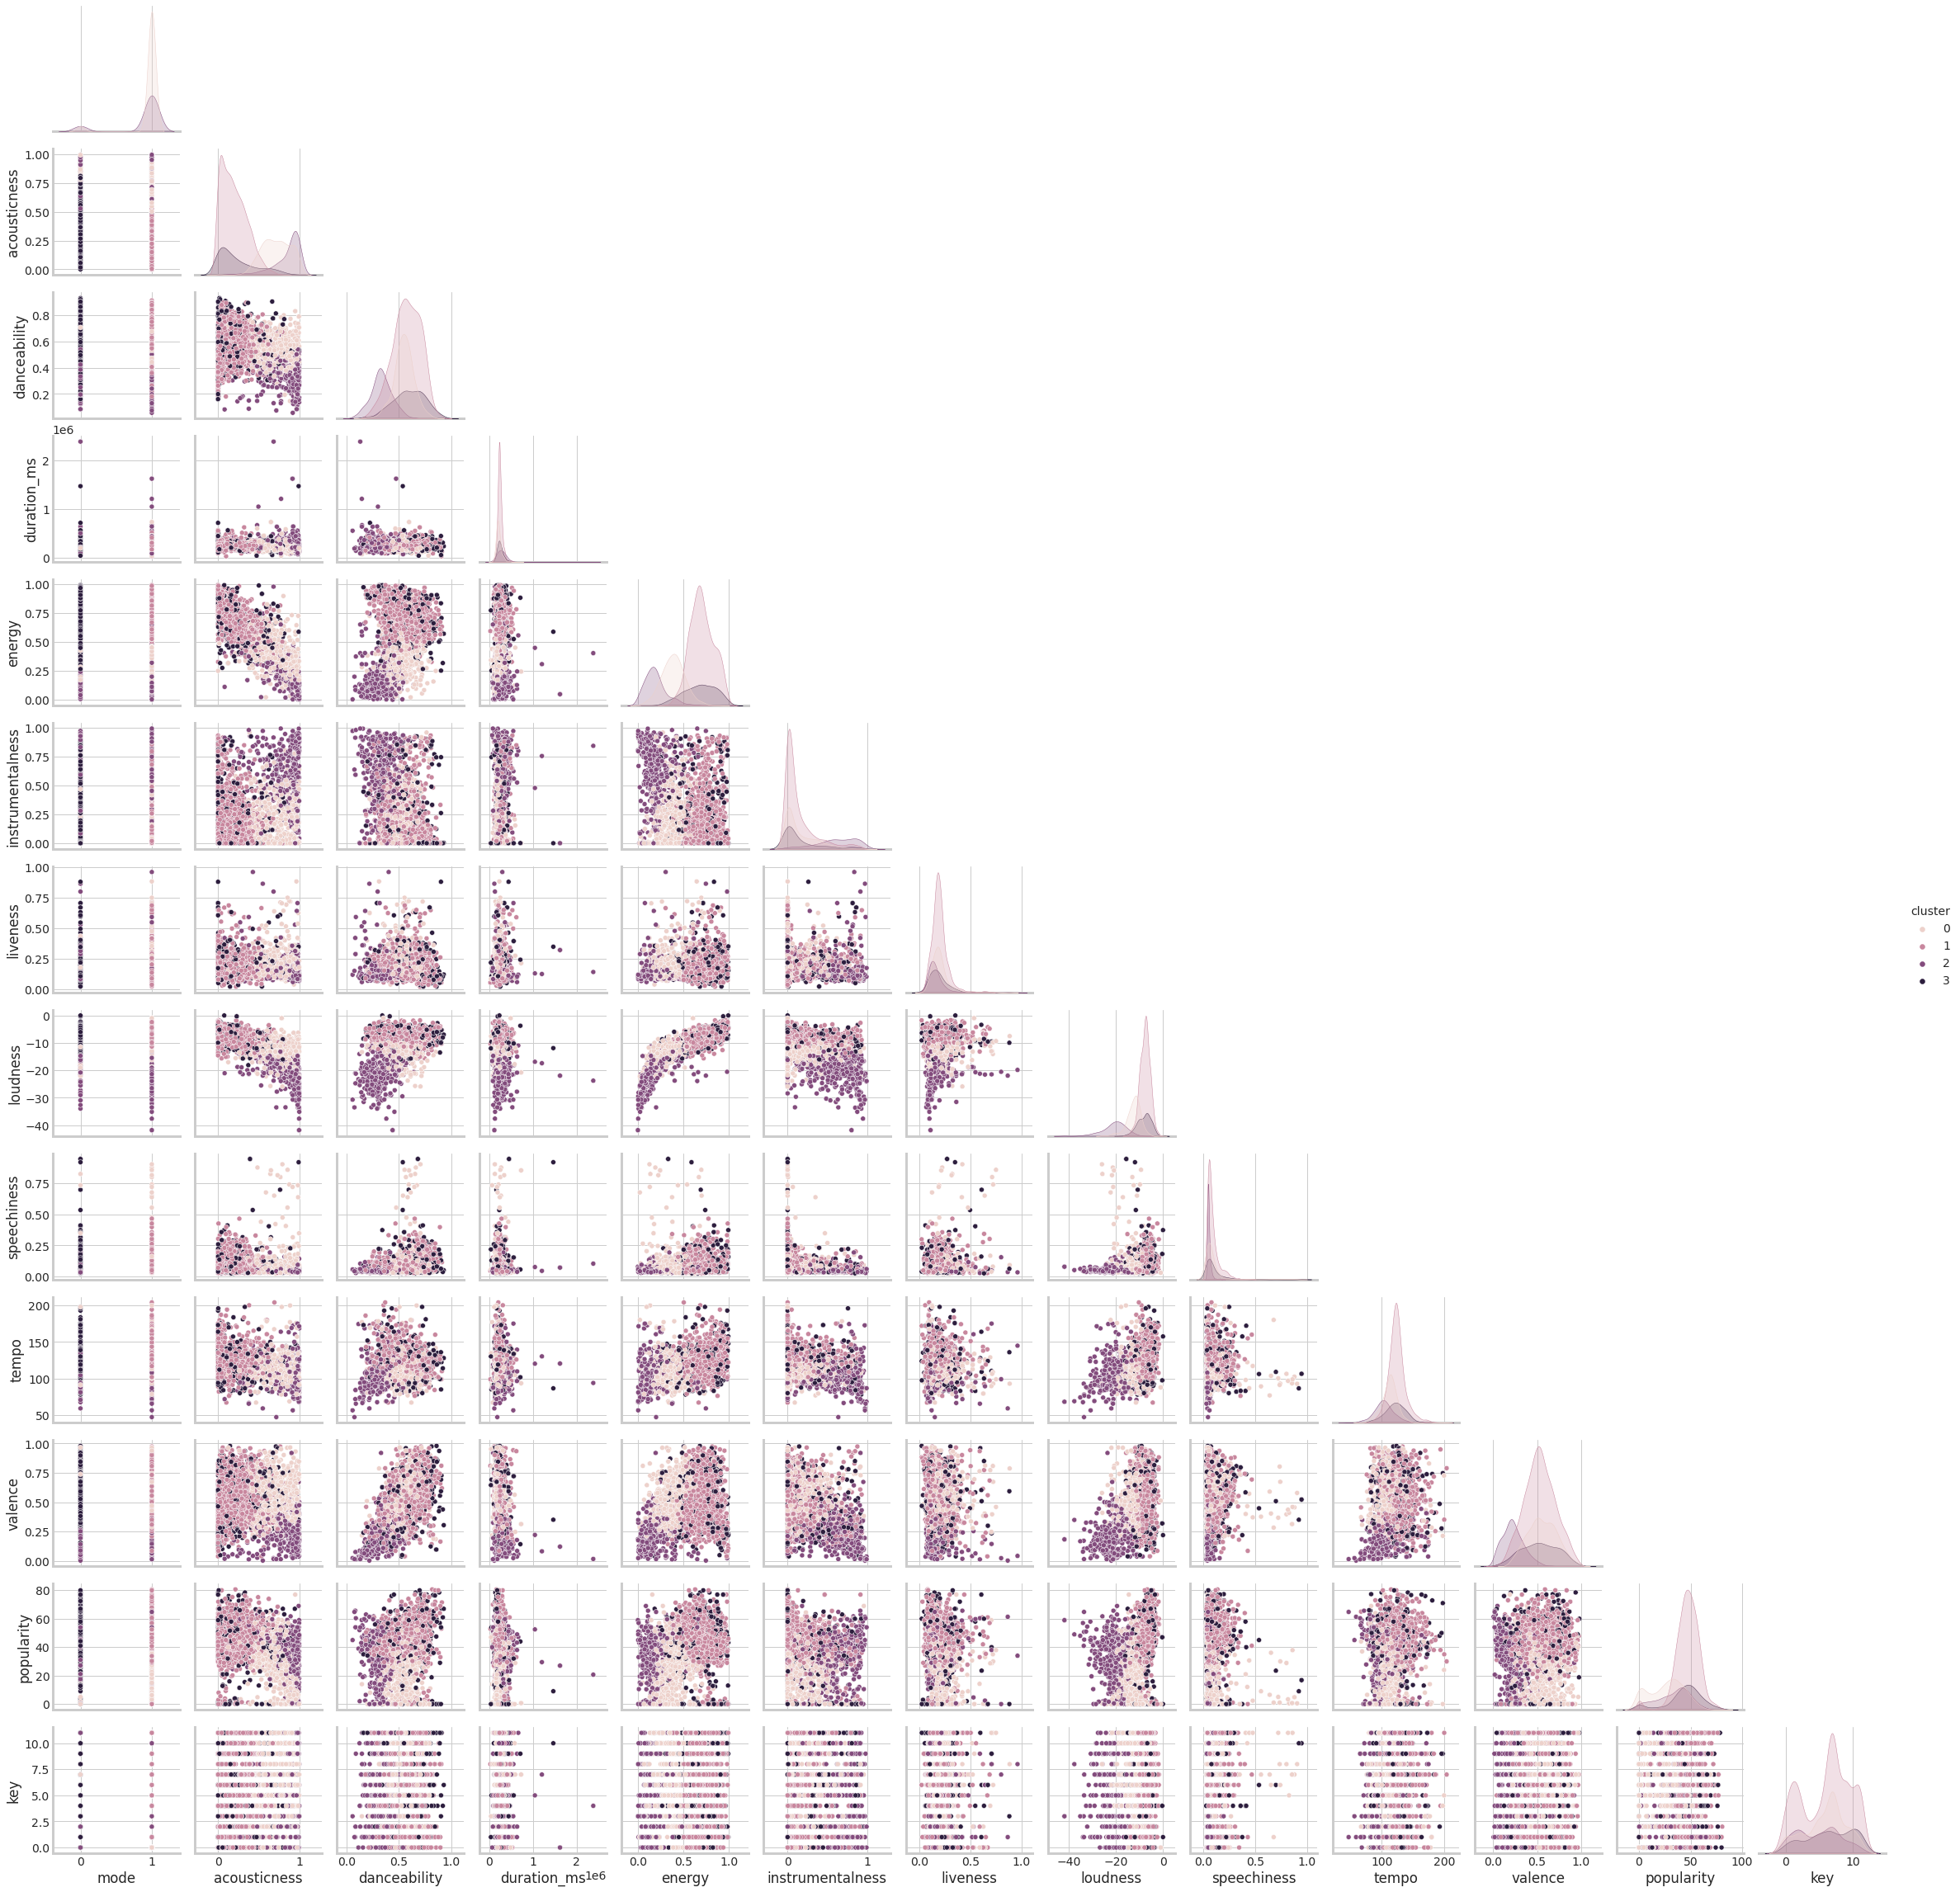

In [54]:
# Since there are many columns in the dataset, pairplot is hard to read
# Investigating using boxplots first and then pair/scatter plotting the interesting
# columns would be a better approach
sns.pairplot(df, hue='cluster', corner=True)
plt.xticks(rotation = 90)

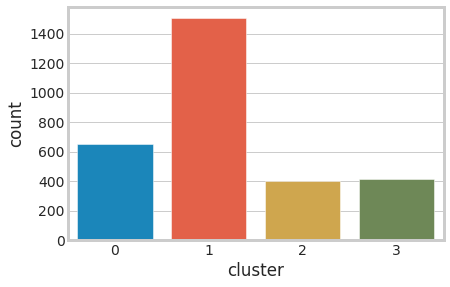

In [55]:
# Visually plotting how many points belong to each cluster 
sns.countplot(x='cluster', data=df)

# **Comment**: 
Showing how many points belong to each cluster
